#### Verifica e instala pacotes

In [2]:
if(!require('dplyr')) install.packages('dplyr')
#if(!require('tm.plugin.webmining')) install.packages('tm.plugin.webmining')
if(!require('purr')) install.packages('purr')
if(!require('tidytext')) install.packages('tidytext')
if(!require('gutenbergr')) install.packages('gutenbergr')
if(!require('ggplot2')) install.packages('ggplot2')

Loading required package: purr
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘purr’”Warning message:
“package ‘purr’ is not available (for R version 3.5.1)”

In [3]:
library(dplyr)
#library(tm.plugin.webmining)
library(purrr)
library(tidytext)
library(gutenbergr)
library(ggplot2)

In [4]:
dickens <- gutenberg_download(c(98, 1400, 46, 730, 786))

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest
Using mirror http://aleph.gutenberg.org


library(gutenbergr)
#gutenberg_metadata
library(stringr)
gutenberg_works(str_detect(language, "pt"))

In [5]:
tidy_dickens <- dickens %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words)

Joining, by = "word"


In [6]:
bing_word_counts <- tidy_dickens %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()
bing_word_counts

Joining, by = "word"


word,sentiment,n
miss,negative,702
poor,negative,350
dark,negative,299
hard,negative,223
dead,negative,218
strong,positive,203
love,positive,202
fell,negative,198
death,negative,194
cold,negative,192


In [7]:
tidy_dickens %>%
  count(word, sort = TRUE)

word,n
time,1218
hand,918
night,835
looked,814
head,813
oliver,766
dear,751
joe,718
miss,702
sir,697


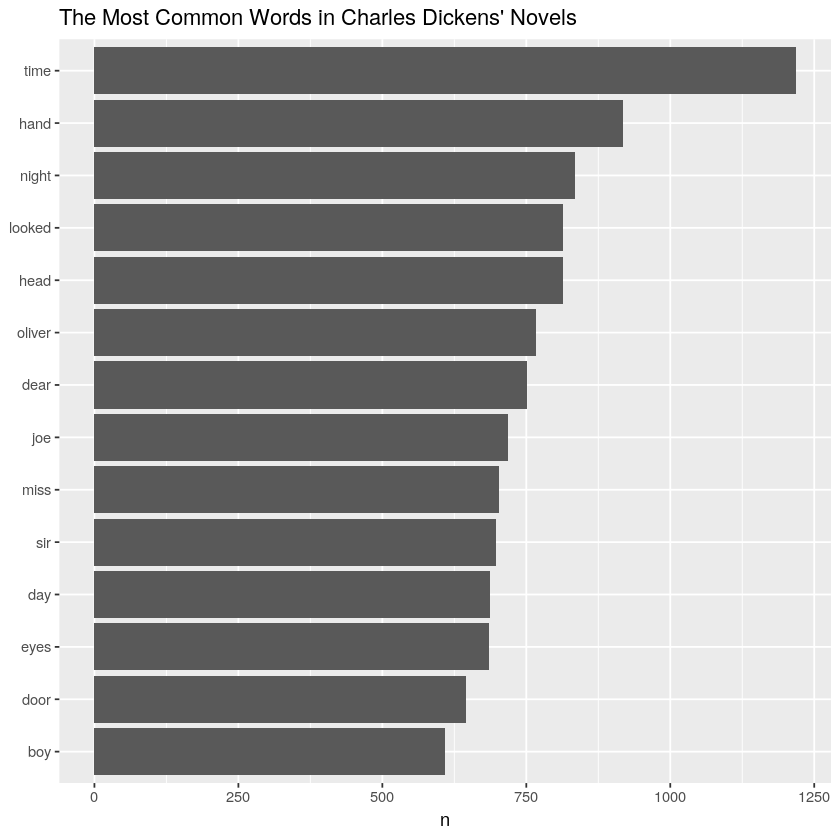

In [8]:
tidy_dickens %>%
  count(word, sort = TRUE) %>%
  filter(n > 600) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col() +
  xlab(NULL) +
  coord_flip() + ggtitle("The Most Common Words in Charles Dickens' Novels")

In [9]:
bing_word_counts <- tidy_dickens %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()
bing_word_counts

Joining, by = "word"


word,sentiment,n
miss,negative,702
poor,negative,350
dark,negative,299
hard,negative,223
dead,negative,218
strong,positive,203
love,positive,202
fell,negative,198
death,negative,194
cold,negative,192


Selecting by n


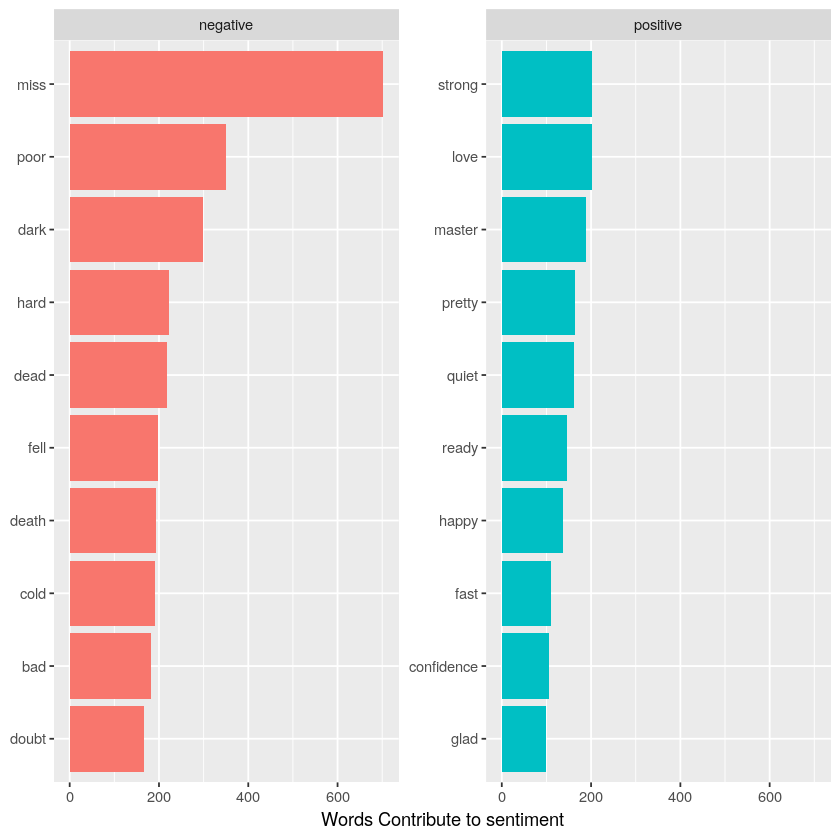

In [10]:
bing_word_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Words Contribute to sentiment",
       x = NULL) +
  coord_flip()

Loading required package: wordcloud
Loading required package: RColorBrewer
Joining, by = "word"


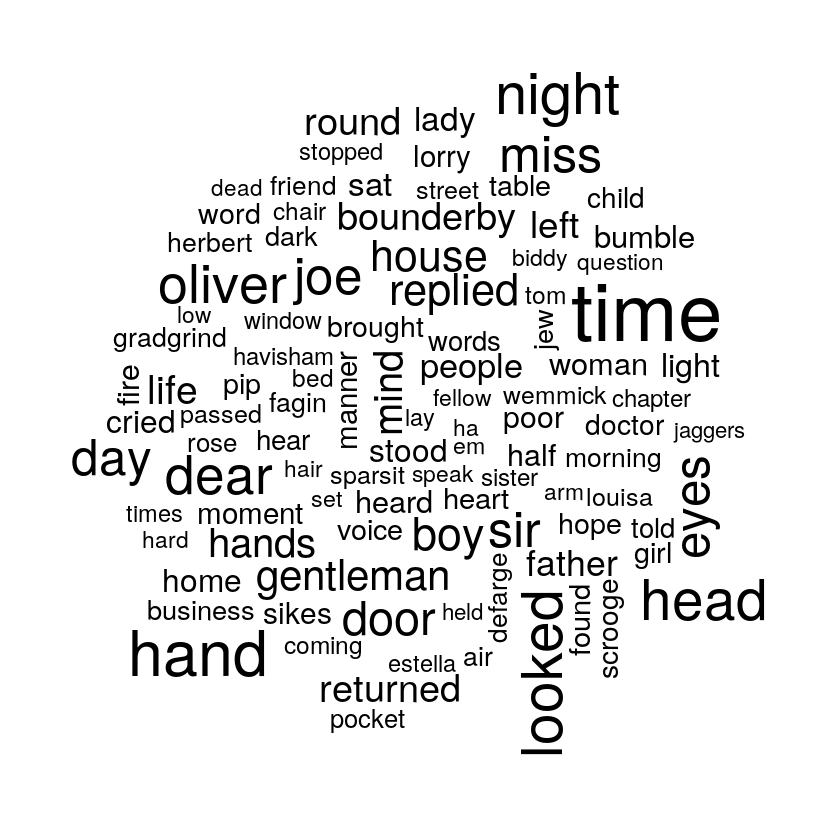

In [11]:
if(!require('wordcloud')) install.packages('wordcloud')
library(wordcloud)
tidy_dickens %>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 100))

Joining, by = "word"


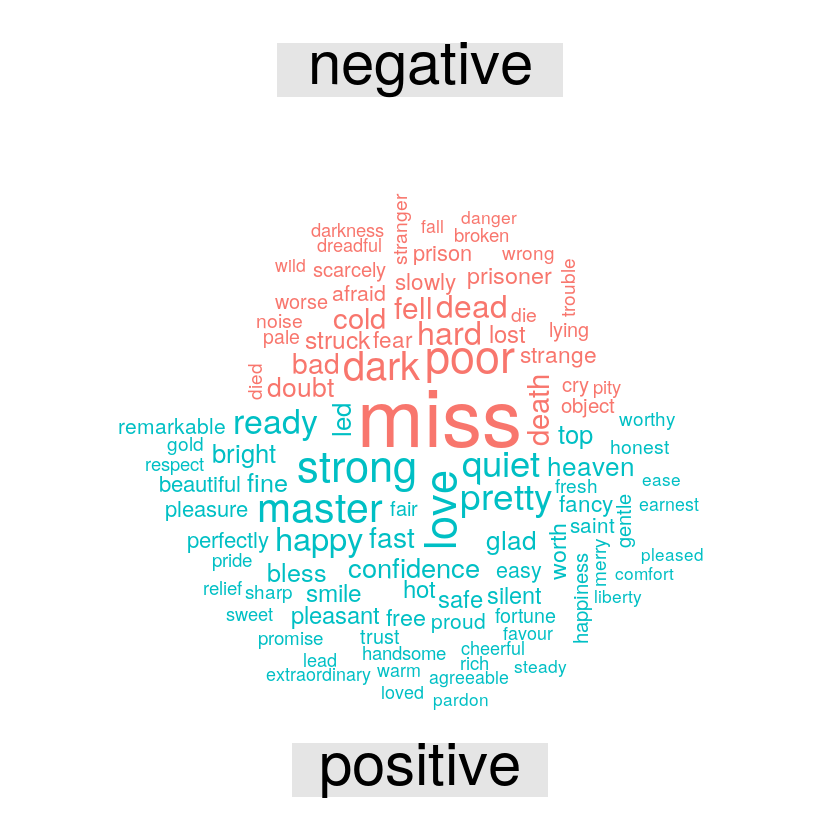

In [12]:
library(reshape2)
tidy_dickens %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("#F8766D", "#00BFC4"),
                   max.words = 100)

In [13]:
dickens_bigrams <- dickens %>%
  unnest_tokens(bigram, text, token = "ngrams", n = 2)
dickens_bigrams

gutenberg_id,bigram
46,a christmas
46,christmas carol
46,carol in
46,in prose
46,prose being
46,being a
46,a ghost
46,ghost story
46,story of
46,of christmas


In [15]:
library(tidyr)
bigrams_separated <- dickens_bigrams %>%
  separate(bigram, c("word1", "word2"), sep = " ")
bigrams_filtered <- bigrams_separated %>%
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word)
bigram_counts <- bigrams_filtered %>% 
  count(word1, word2, sort = TRUE)
bigram_counts

word1,word2,n
miss,havisham,236
miss,pross,144
madame,defarge,113
dear,boy,77
ha,ha,77
doctor,manette,75
miss,havisham's,74
oliver,twist,55
sir,replied,54
wine,shop,52


In [16]:
bigrams_united <- bigrams_filtered %>%
  unite(bigram, word1, word2, sep = " ")
bigrams_united

gutenberg_id,bigram
46,christmas carol
46,ghost story
46,charles dickens
46,dickens preface
46,houses pleasantly
46,faithful friend
46,december 1843
46,1843 contents
46,contents stave
46,marley's ghost


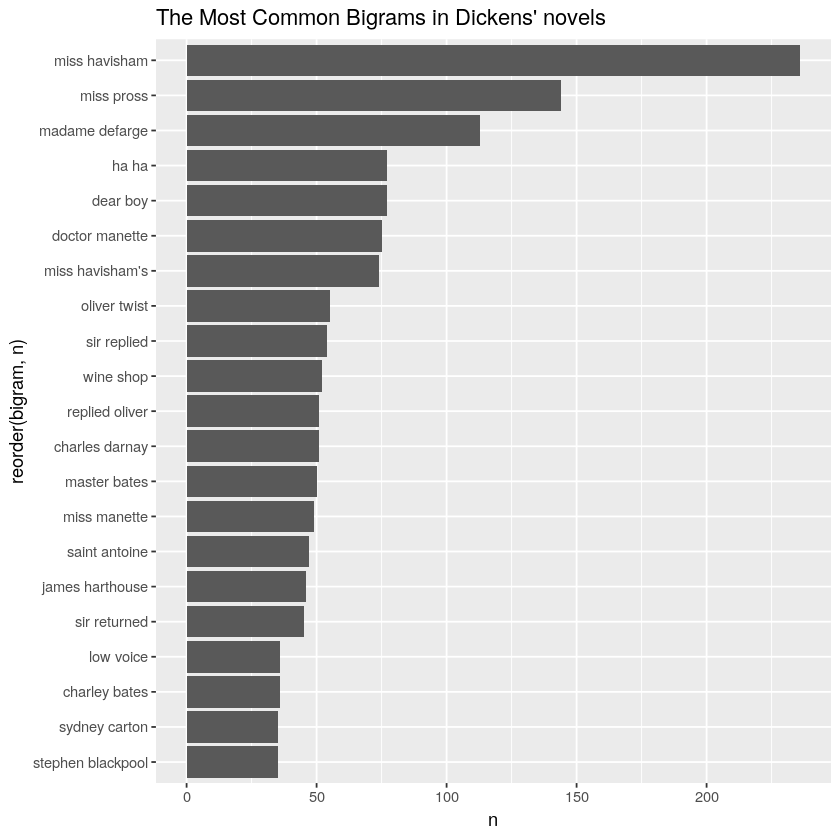

In [17]:
bigram_tf_idf <- bigrams_united %>%
  count(bigram)
bigram_tf_idf <- bigram_tf_idf %>% filter(n>30)
ggplot(aes(x = reorder(bigram, n), y=n), data=bigram_tf_idf) + geom_bar(stat = 'identity') + ggtitle("The Most Common Bigrams in Dickens' novels") + coord_flip()

In [20]:
library(igraph)
bigram_graph <- bigram_counts %>%
  filter(n > 20) %>%
  graph_from_data_frame()
bigram_graph


Attaching package: ‘igraph’

The following object is masked from ‘package:tidyr’:

    crossing

The following objects are masked from ‘package:purrr’:

    compose, simplify

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



IGRAPH f8a20fc DN-- 61 37 -- 
+ attr: name (v/c), n (e/n)
+ edges from f8a20fc (vertex names):
 [1] miss    ->havisham   miss    ->pross      madame  ->defarge   
 [4] dear    ->boy        ha      ->ha         doctor  ->manette   
 [7] miss    ->havisham's oliver  ->twist      sir     ->replied   
[10] wine    ->shop       charles ->darnay     replied ->oliver    
[13] master  ->bates      miss    ->manette    saint   ->antoine   
[16] james   ->harthouse  sir     ->returned   charley ->bates     
[19] low     ->voice      stephen ->blackpool  sydney  ->carton    
[22] god     ->bless      monsieur->defarge    public  ->house     
+ ... omitted several edges

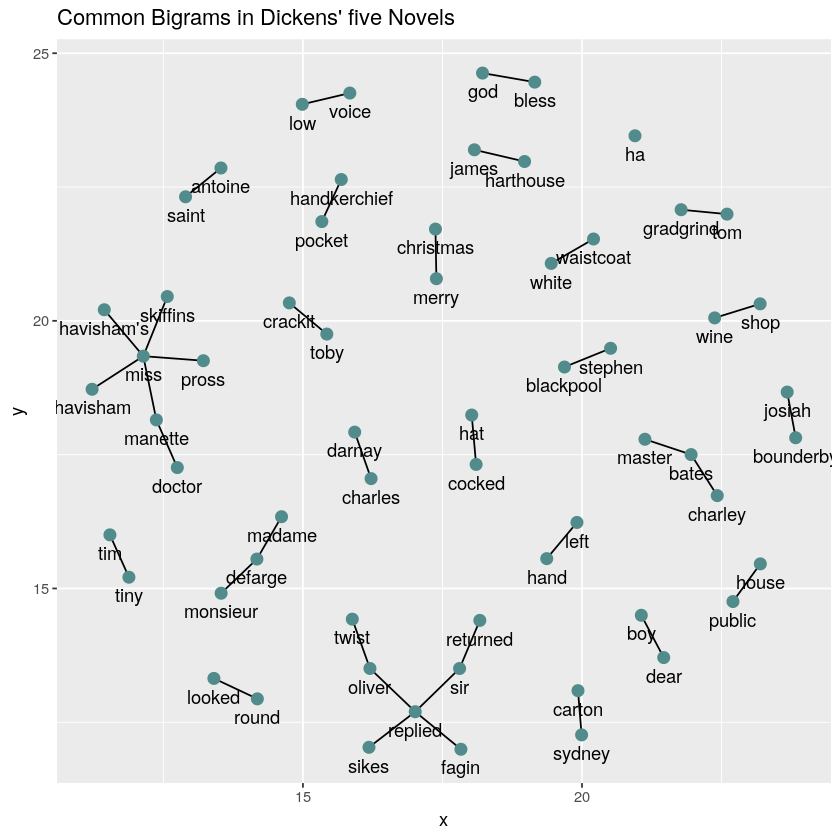

In [23]:
library(ggraph)
set.seed(2017)
ggraph(bigram_graph, layout = "fr") +
  geom_edge_link() +
  geom_node_point(color = "darkslategray4", size = 3) +
  geom_node_text(aes(label = name), vjust = 1.8) + ggtitle("Common Bigrams in Dickens' five Novels")

In [37]:
library(readr)
library(stringr)
# text <- gutenberg_download(98)
# typeof(text)
# text
raw_tale <- read_lines('98-0.txt', skip = 30, n_max = 15500)
tale <- character()
for (i in seq_along(raw_tale)) {
        if (i%%10 == 1) tale[ceiling(i/10)] <- str_c(raw_tale[i], 
                                                     raw_tale[i+1],
                                                     raw_tale[i+2],
                                                     raw_tale[i+3],
                                                     raw_tale[i+4],
                                                     raw_tale[i+5],
                                                     raw_tale[i+6],
                                                     raw_tale[i+7],
                                                     raw_tale[i+8],
                                                     raw_tale[i+9], sep = " ")
}
tale[9:10]

[1] "I. The Period   It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light,"                                                                                                                                                                                                        
[2] "it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way-- in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only."

## Sentiment in “A Tale of Two Cities”

In [38]:
library(syuzhet)
tale_nrc <- cbind(linenumber = seq_along(tale), get_nrc_sentiment(tale))

In [39]:
tale_nrc$negative <- -tale_nrc$negative
pos_neg <- tale_nrc %>% select(linenumber, positive, negative) %>% 
        melt(id = "linenumber")
names(pos_neg) <- c("linenumber", "sentiment", "value")

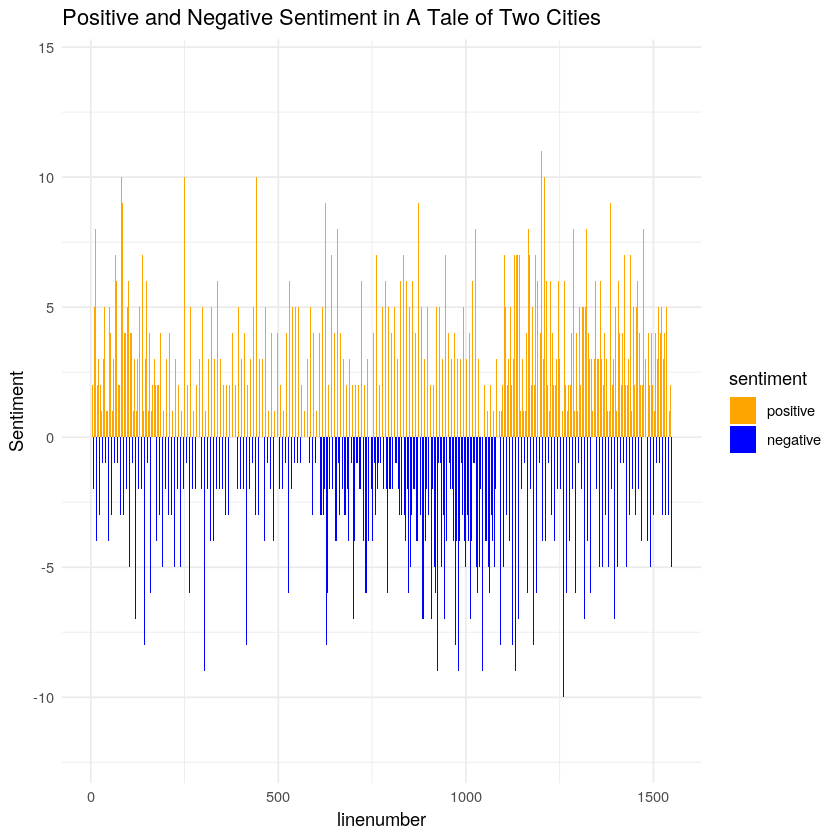

In [40]:
library(ggthemes)
ggplot(data = pos_neg, aes(x = linenumber, y = value, fill = sentiment)) +
        geom_bar(stat = 'identity', position = position_dodge()) + theme_minimal() +
        ylab("Sentiment") + 
        ggtitle("Positive and Negative Sentiment in A Tale of Two Cities") +
  scale_color_manual(values = c("orange", "blue")) +
  scale_fill_manual(values = c("orange", "blue"))

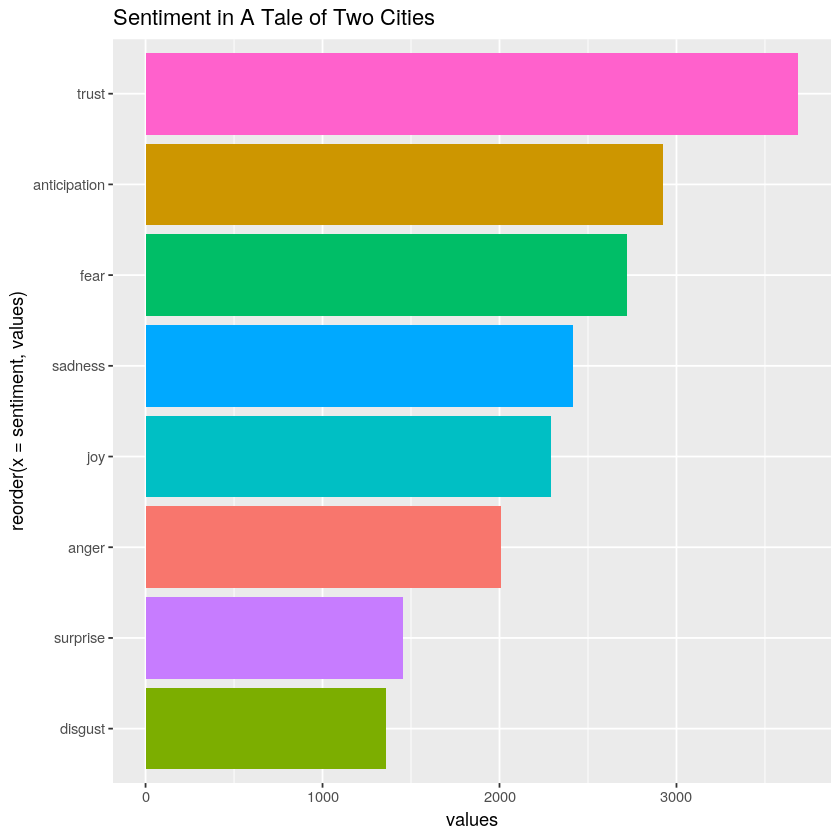

In [41]:
emotions <- tale_nrc %>% select(linenumber, anger, anticipation, 
                                      disgust, fear, joy, sadness, surprise, 
                                      trust) %>% 
        melt(id = "linenumber")
names(emotions) <- c("linenumber", "sentiment", "value")
emotions_group <- group_by(emotions, sentiment)
by_emotions <- summarise(emotions_group, 
                         values=sum(value))
ggplot(aes(reorder(x=sentiment, values), y=values, fill=sentiment), data = by_emotions) +
  geom_bar(stat = 'identity') + ggtitle('Sentiment in A Tale of Two Cities') +
  coord_flip() + theme(legend.position="none")